In [1]:
#IMPORTING LYBRERIES
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
import seaborn as sns
import pandas as pd
import sqlite3

### Get the files

In [2]:
df=pd.read_excel(r'C:\Users\Ramu Jami\Downloads/Bank_Personal_Loan_Modelling.xlsx',1)
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
df.shape

(5000, 14)

## Findinig the null values

In [4]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [5]:
df.drop(['ID','ZIP Code'],inplace=True,axis=1)
#Dropping the "ID" and "ZIP COde" because of unique values

In [6]:
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

## 5 point summary of the data  
### 1)Min value ,2)25%value,3)50% value,4)75% value,5)Max value

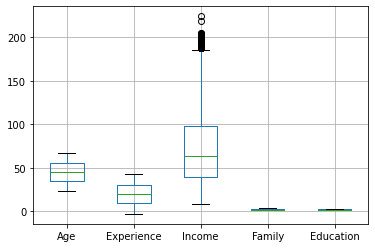

In [7]:
fig=df.boxplot(['Age', 'Experience', 'Income', 'Family', 'Education'])

In [8]:
df[['Age', 'Experience', 'Income', 'Family', 'Education']].describe()

,Age,Experience,Income,Family,Education
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.881000
std,11.463166,11.467954,46.033729,1.147663,0.839869
min,23.000000,-3.000000,8.000000,1.000000,1.000000
25%,35.000000,10.000000,39.000000,1.000000,1.000000
50%,45.000000,20.000000,64.000000,2.000000,2.000000
75%,55.000000,30.000000,98.000000,3.000000,3.000000
max,67.000000,43.000000,224.000000,4.000000,3.000000


In [9]:
df.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [10]:
df["Income"].skew()

0.8413386072610816

In [11]:
df["Experience"].skew()

-0.026324688402384513

In [12]:
#Checking skewness
df.skew()

Age                  -0.029341
Experience           -0.026325
Income                0.841339
Family                0.155221
CCAvg                 1.598457
Education             0.227093
Mortgage              2.104002
Personal Loan         2.743607
Securities Account    2.588268
CD Account            3.691714
Online               -0.394785
CreditCard            0.904589
dtype: float64

In [13]:
df.dtypes

Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Experience'}>,
        <AxesSubplot:title={'center':'Income'}>],
       [<AxesSubplot:title={'center':'Family'}>,
        <AxesSubplot:title={'center':'CCAvg'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Mortgage'}>,
        <AxesSubplot:title={'center':'Personal Loan'}>,
        <AxesSubplot:title={'center':'Securities Account'}>],
       [<AxesSubplot:title={'center':'CD Account'}>,
        <AxesSubplot:title={'center':'Online'}>,
        <AxesSubplot:title={'center':'CreditCard'}>]], dtype=object)

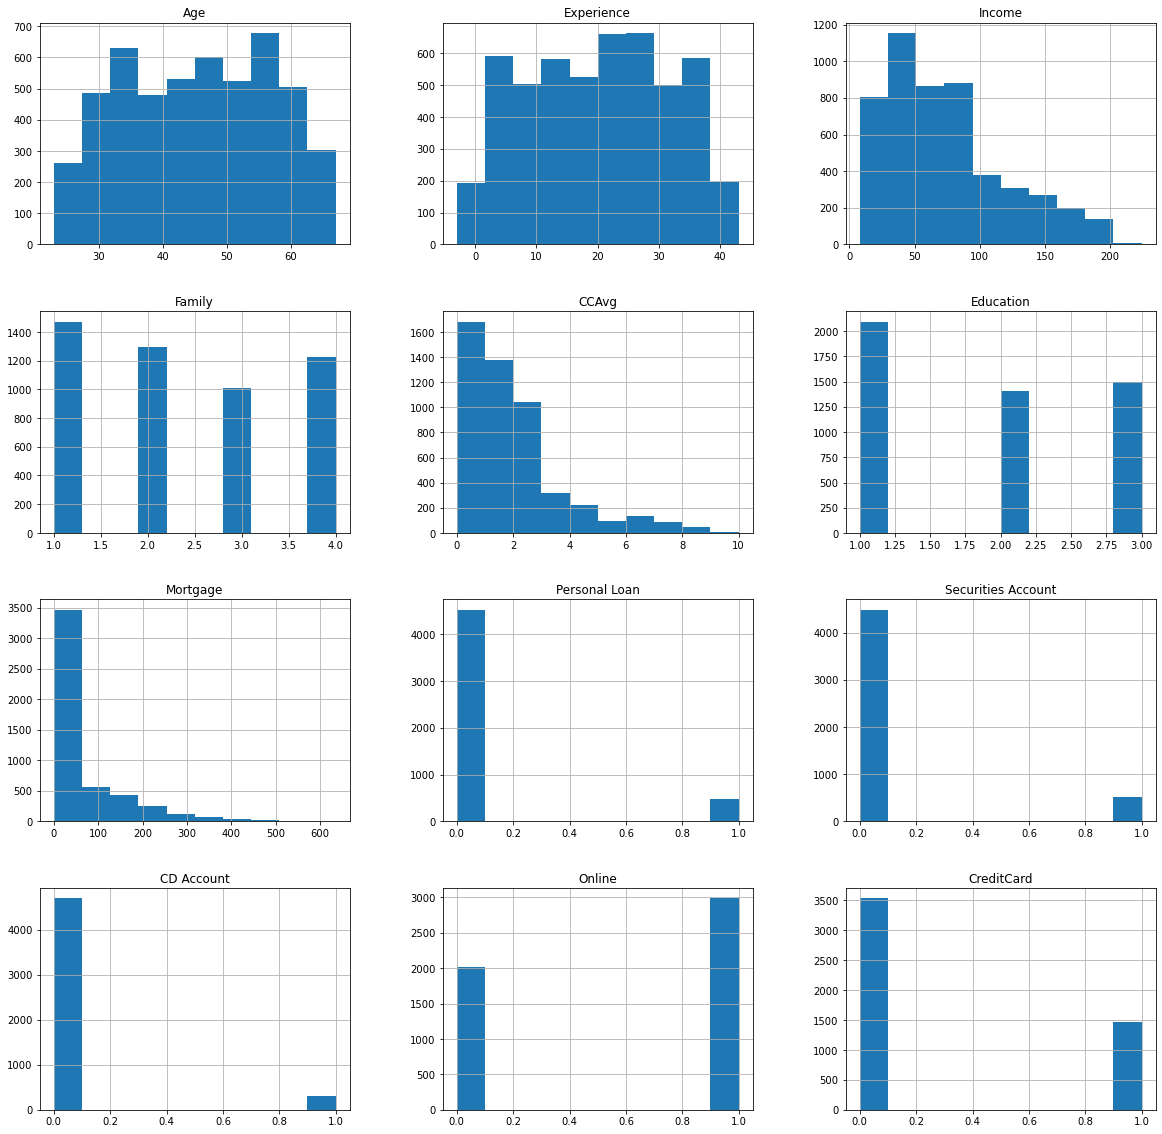

In [14]:
df.hist(figsize=(20,20))
#Using hist to check the skew in every factor

C:\Users\Ramu Jami\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Experience', ylabel='Density'>

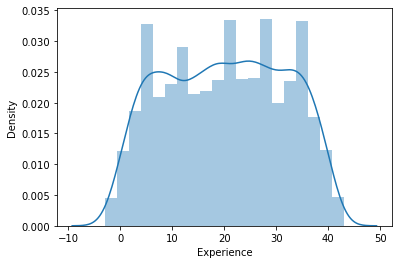

In [15]:
#distribution of experience
sns.distplot(df["Experience"])
#so we can see it has contains some -ve value

In [16]:
df["Experience"].mean()

20.1046

In [17]:
# people with -ve experience
negative_exp=df[df["Experience"]<0]
negative_exp.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25,-1,113,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,4,0.20,1,0,0,0,0,1,0


C:\Users\Ramu Jami\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

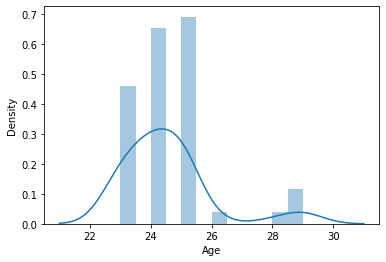

In [18]:
# we are watching the relation between the negative exp to the age 
sns.distplot(negative_exp["Age"])
#it says 22 to 26 age people have -ve values

In [19]:
negative_exp["Experience"].mean()

-1.4423076923076923

In [20]:
#To see how many size of negative entries 
negative_exp.size

624

In [21]:
#WE ARE TRYING TO SEE HOW MUCH PERCENTAGE IS NEGATIVE_EXP IN WHOLE DATA
print(" there are {} records which has negative values for experience, approx {} ".format(negative_exp.size,((negative_exp.size/df.size)*100)))

 there are 624 records which has negative values for experience, approx 1.04 


In [22]:
data=df.copy()

In [23]:
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [24]:
#Replace the -Ve values with the Experience.mean()
data["Experience"]=np.where(data["Experience"]<0,data["Experience"].mean(),data["Experience"])

C:\Users\Ramu Jami\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Experience', ylabel='Density'>

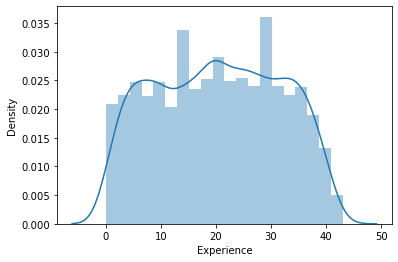

In [25]:
sns.distplot(data["Experience"])

In [26]:
data[data["Experience"]<0]
#WE CAN SEE NO  -VE VALUES

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


<AxesSubplot:>

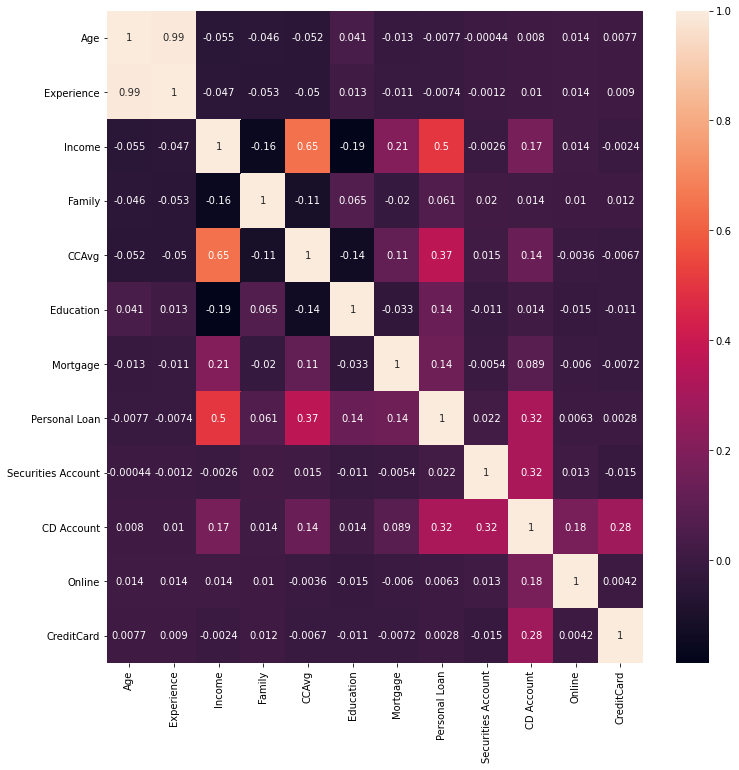

In [28]:
#WE CAN SEE CO-RELATION OF THE DATA
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

### AS WE SEE CORR IN EXP AND AGE ARE VERY HIGH WE SHOULD DROP ONE

In [29]:
data.drop(["Experience"],inplace=True,axis=1)

In [30]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


In [31]:
data["Education"].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [32]:
#1 IN EDUCATION MEANS UNDER GRADUATE 2 MEANS GRADUATE 3 MEANS ADVANCED/PROFESIONAL
def mark(x):
    if x==1:
        return "UnderGraduate"
    if x==2:
        return "Graduate"                                    
    if x==3:
        return "Advanced/Profesional"

In [33]:
#IMPLEMENTING ANOTHER COLUMN WITH DESCRIBES EDUCATION STATUS PRECISELY
data["Edu_mark"]=data["Education"].apply(mark)

In [34]:
data.head(10)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Edu_mark
0,25,49,4,1.6,1,0,0,1,0,0,0,UnderGraduate
1,45,34,3,1.5,1,0,0,1,0,0,0,UnderGraduate
2,39,11,1,1.0,1,0,0,0,0,0,0,UnderGraduate
3,35,100,1,2.7,2,0,0,0,0,0,0,Graduate
4,35,45,4,1.0,2,0,0,0,0,0,1,Graduate
5,37,29,4,0.4,2,155,0,0,0,1,0,Graduate
6,53,72,2,1.5,2,0,0,0,0,1,0,Graduate
7,50,22,1,0.3,3,0,0,0,0,0,1,Advanced/Profesional
8,35,81,3,0.6,2,104,0,0,0,1,0,Graduate
9,34,180,1,8.9,3,0,1,0,0,0,0,Advanced/Profesional


In [35]:
Edu_dis=data["Edu_mark"].value_counts()

In [36]:
Edu_dis

UnderGraduate           2096
Advanced/Profesional    1501
Graduate                1403
Name: Edu_mark, dtype: int64

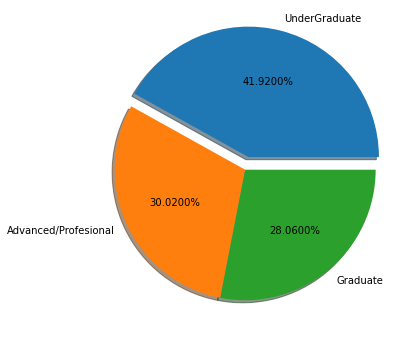

In [37]:
#USING PIE CHART TO SHOW THE ACTUALL PERCENTAGE OF EVERY EDUCATIONAL STANDARD
plt.figure(figsize=(6,6))
explode=[0.1,0,0]
fig=plt.pie(Edu_dis,labels=Edu_dis.index,shadow=True,explode=explode,autopct="%2.4f%%")

### Explore the accont holder distribution

In [41]:
data["CD Account"].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [42]:
data.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Edu_mark'],
      dtype='object')

In [43]:
#considering certain conditionS
def security_cd(row):
    if (row["Securities Account"]==1)& (row["CD Account"]==1):
        return "hold securities & deposits"
    elif (row["Securities Account"]==0) &(row["CD Account"]==0):
        return "doesn't holds securities & deposits"
    elif (row["Securities Account"]==1)& (row["CD Account"]==0):
        return "hold only securities"
    elif (row["Securities Account"]==0)& (row["CD Account"]==1):
        return "hold deposits"
    
        

In [44]:
data["Account_holder_category"]=data.apply(security_cd,axis=1)

In [45]:
data.head()
#New column is added

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Edu_mark,Account_holder_category
0,25,49,4,1.6,1,0,0,1,0,0,0,UnderGraduate,hold only securities
1,45,34,3,1.5,1,0,0,1,0,0,0,UnderGraduate,hold only securities
2,39,11,1,1.0,1,0,0,0,0,0,0,UnderGraduate,doesn't holds securities & deposits
3,35,100,1,2.7,2,0,0,0,0,0,0,Graduate,doesn't holds securities & deposits
4,35,45,4,1.0,2,0,0,0,0,0,1,Graduate,doesn't holds securities & deposits


In [46]:
values=data["Account_holder_category"].value_counts()

In [47]:
values.index

Index(['doesn't holds securities & deposits', 'hold only securities',
       'hold deposits', 'hold securities & deposits'],
      dtype='object')

([<matplotlib.patches.Wedge at 0x1dd9c20aca0>,
 [Text(-1.0019739802022927, 0.4539252614666601, "doesn't holds securities & deposits"),
  Text(0.898372205078986, -0.634765611183782, 'hold only securities'),
  Text(1.0565156811002825, -0.30622641229849246, 'hold deposits'),
  Text(1.095311347881014, -0.1014546756097345, 'hold securities & deposits')],
 [Text(-0.5465312619285232, 0.24759559716363277, '86.4600%'),
  Text(0.49002120277035593, -0.3462357879184266, '7.5000%'),
  Text(0.576281280600154, -0.1670325885264504, '3.1000%'),
  Text(0.5974425533896439, -0.05533891396894608, '2.9400%')])

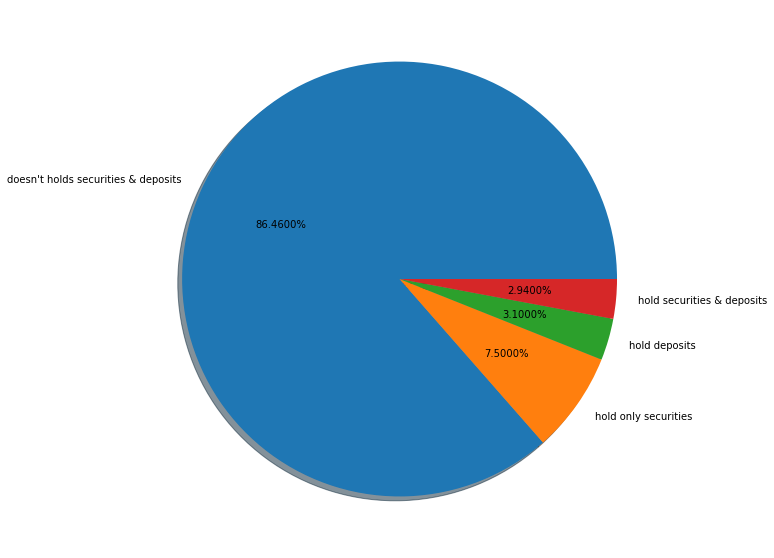

In [48]:
#Plotting account holder categories
plt.figure(figsize=(10,10))
plt.pie(values,labels=values.index,shadow=True,autopct="%2.4f%%")

In [49]:
data[["CD Account","CreditCard"]].corr()

,CD Account,CreditCard
CD Account,1.000000,0.278644
CreditCard,0.278644,1.000000



### -Analyse the customer on the basis of their education status, income &personal loan status

In [51]:
data.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Edu_mark', 'Account_holder_category'],
      dtype='object')

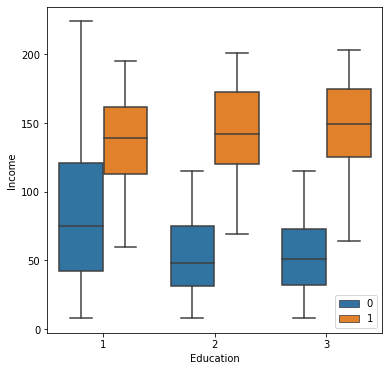

In [52]:
import seaborn as sns
plt.figure(figsize=(6,6))
sns.boxplot(x="Education",y="Income",data=data, hue="Personal Loan")
plt.legend(loc=4)

C:\Users\Ramu Jami\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Ramu Jami\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


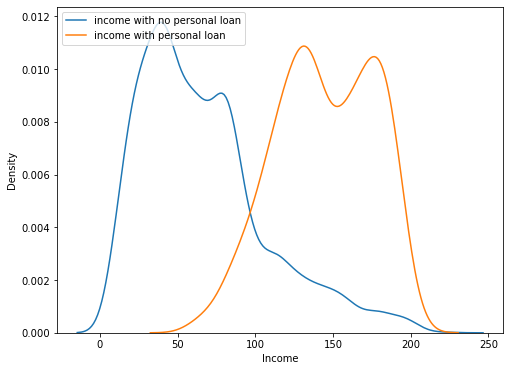

In [53]:
plt.figure(figsize=(8,6))
sns.distplot(data[data["Personal Loan"]==0]["Income"],hist=False,label="income with no personal loan")
#this is the distribution of those customers those who are not avail for the loan
sns.distplot(data[data["Personal Loan"]==1]["Income"],hist=False,label="income with personal loan")
#this is the distribution of those customers those who are avail for the loan
plt.legend(loc=2)

### Automate the analysis

In [54]:
def plot(col1,col2,label1,label2,title):
    plt.figure(figsize=(8,6))
    sns.distplot(data[data[col1]==0][col2],hist=False,label=label1)
    sns.distplot(data[data[col1]==1][col2],hist=False,label=label2)
    plt.title(title)
    plt.legend(loc=1)


C:\Users\Ramu Jami\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Ramu Jami\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


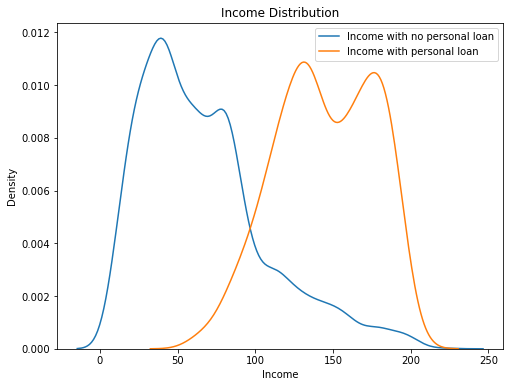

In [55]:
plot("Personal Loan","Income","Income with no personal loan","Income with personal loan","Income Distribution")

C:\Users\Ramu Jami\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Ramu Jami\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


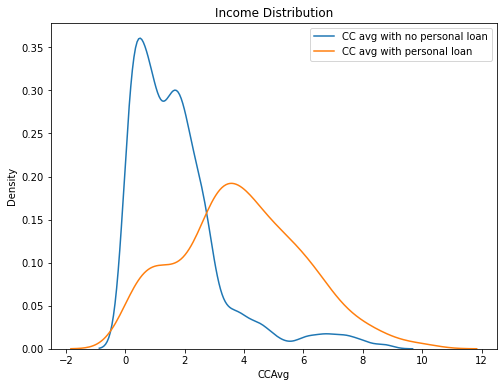

In [56]:
plot("Personal Loan","CCAvg","CC avg with no personal loan","CC avg with personal loan","Income Distribution")

C:\Users\Ramu Jami\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Ramu Jami\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


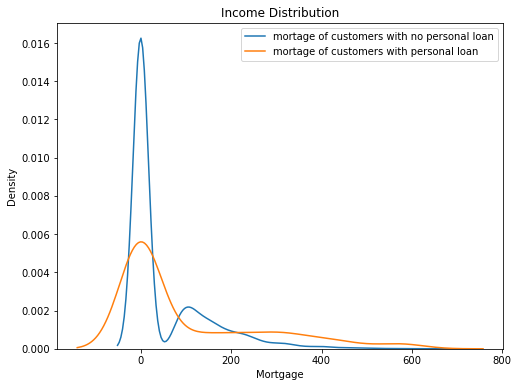

In [57]:
plot("Personal Loan","Mortgage","mortage of customers with no personal loan","mortage of customers with personal loan","Income Distribution")

### Personal loan of customers on the basis of security account,online, account holder, category, credit card

In [58]:
data.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Edu_mark', 'Account_holder_category'],
      dtype='object')

In [59]:
col_names=['Securities Account','Online','Account_holder_category','CreditCard']

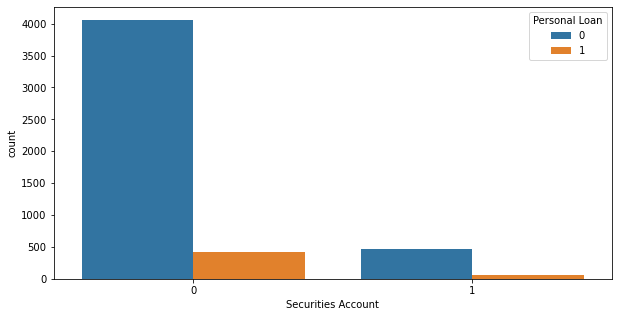

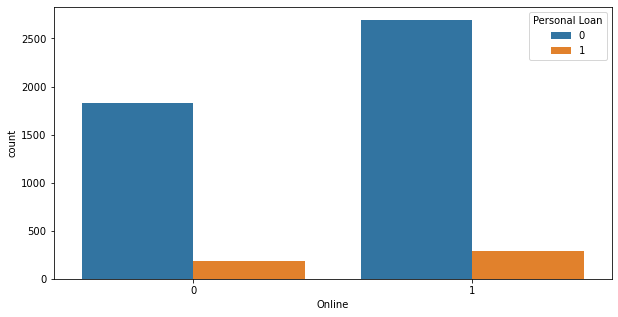

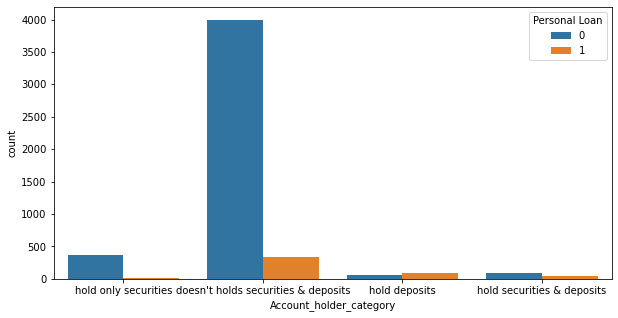

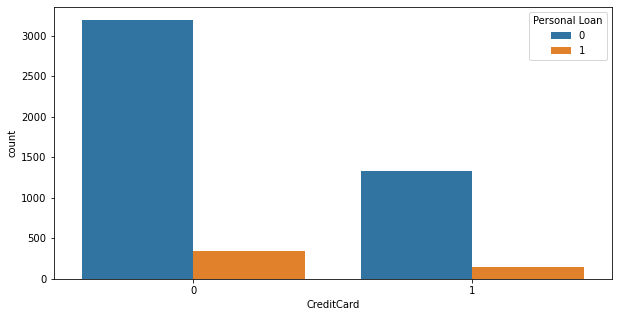

In [60]:
for i in col_names:
    plt.figure(figsize=(10,5))
    sns.countplot( x=i,hue="Personal Loan",data=data)
    

### How age of a person is going to be a factor in available loan?? does
### Automating further
### Does income of a person have an impact on available loan?
### Does the family size makes time to avail loan?


C:\Users\Ramu Jami\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Personal Loan'>

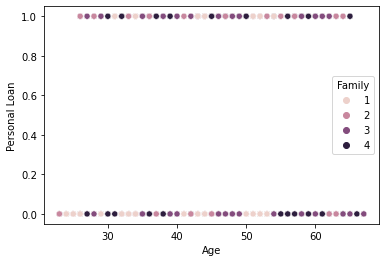

In [61]:
sns.scatterplot(data["Age"],data["Personal Loan"],hue=data["Family"])

In [62]:
import scipy.stats as stats

<AxesSubplot:xlabel='Age', ylabel='Personal Loan'>

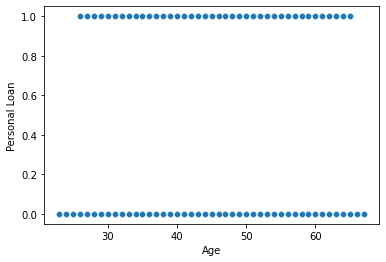

In [63]:
sns.scatterplot(x="Age",y="Personal Loan",data=data)

In [64]:
data[["Age","Personal Loan"]].corr()

,Age,Personal Loan
Age,1.000000,-0.007726
Personal Loan,-0.007726,1.000000


In [65]:
import scipy.stats as stats

In [66]:
#CREATING NULL HHYPOTHESIS AND IT'S REVERSE
Ho="Age does not have impact on available personal loan"
Ha="Age does have impact on available personal loan"

In [67]:
Age_no=np.array(data[data["Personal Loan"]==0]["Age"])
Age_yes=np.array(data[data["Personal Loan"]==1]["Age"])

In [68]:
t,p_value=stats.ttest_ind(Age_no,Age_yes,axis=0)
if p_value<0.05:
    print(Ha,"as the p_value is less than 0.5 with a value of {}".format(p_value))
else:
    print(Ho,"as the p_value is greater than 0.5 with a value of {}".format(p_value))


Age does not have impact on available personal loan as the p_value is greater than 0.5 with a value of 0.584959263705325


In [69]:
def hypothesis(col1,col2,Ho,Ha):
    array1=np.array(data[data[col1]==0][col2])
    array2=np.array(data[data[col1]==1][col2])
    t,p_value=stats.ttest_ind(array1,array2,axis=0)
    if p_value<0.05:
        print("{} as the p_value is less than 0.5 with a value of {}".format(Ha,p_value))
    else:
        print("{} as the p_value is greater than 0.5 with a value of {}".format(Ho,p_value))

    

In [70]:
hypothesis("Personal Loan","Age",Ho="Age does not have impact on available personal loan",Ha="Age does have impact on available personal loan")

Age does not have impact on available personal loan as the p_value is greater than 0.5 with a value of 0.584959263705325


In [71]:
hypothesis("Personal Loan","Income",Ho="Income does not have impact on available personal loan",Ha="Income does have impact on available personal loan")

Income does have impact on available personal loan as the p_value is less than 0.5 with a value of 0.0


In [72]:
hypothesis("Personal Loan","Family",Ho="Family does not have impact on available personal loan",Ha="Family does have impact on available personal loan")

Family does have impact on available personal loan as the p_value is less than 0.5 with a value of 1.4099040685673807e-05
